### Feature Extraction and Price Prediction for Mobile Phones- Project 4

In [66]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

## Load Dataset

In [69]:
data=pd.read_csv(r"C:\Users\DHRUV PATEL\Dhruv\dhruv\Dataset\Project 4 Data.csv")

In [71]:
data

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


## Data Preprocessing

### Dimmensions 

In [75]:
#Dimmensions of the data
print("data Dimmension:",data.shape)

data Dimmension: (541, 12)


In [77]:
print("The no of rows are ",data.shape[0])
print("The no of columns are",data.shape[1])

The no of rows are  541
The no of columns are 12


In [79]:
# head()- to see first five rows
data.head() 

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"


### Information of Data

In [82]:
#info-information of the data frame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 50.8+ KB


### Drop unnecesary columns

In [85]:
# let us drop the Unnamed: 0  collumn 
data.drop('Unnamed: 0',axis=1,inplace=True)

In [87]:
data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,"7,299"
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,"11,999"
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,"5,649"
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,"8,999"
...,...,...,...,...,...,...,...,...,...,...,...
536,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,"79,999"
537,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,"5,998"
538,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,"9,990"
539,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core","38,999"


In [89]:
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'Battery_', 'Rear Camera',
       'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_', 'Prize'],
      dtype='object')

## Unique Values

In [92]:
# Identify unique values
unique_values={col:data[col].nunique() for col in data.columns}
print("Unique Values:",unique_values)

Unique Values: {'Model': 187, 'Colour': 275, 'Memory': 5, 'RAM': 5, 'Battery_': 37, 'Rear Camera': 14, 'Front Camera': 13, 'AI Lens': 2, 'Mobile Height': 38, 'Processor_': 123, 'Prize': 158}


In [94]:
# Samples of data
data.sample(4)# Samples of data

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
35,POCO C55,Cool Blue,128,6,5000,50MP,5MP,0,17.04,Mediatek Helio G85,"8,999"
67,realme C33 2023,Night Sea,128,4,5000,50MP,5MP,0,16.51,Unisoc T612,"10,499"
307,Infinix Note 12,Force Black,64,4,5000,50MP,16MP,1,17.02,MediaTek Helio G88,"10,999"
524,realme 9 5G,Supersonic Black,64,4,5000,48MP,16MP,0,16.51,Mediatek Dimensity 810,"13,499"


### Rename the column Names

In [97]:
data.rename(columns={'Battery_':'mAH of Battery','Rear Camera':'Rear Camera(In MP)','Front Camera':'Front Camera(In MP)','Processor_':'Processor in Phone','Prize':'Price of Phone'},inplace=True)

In [99]:
#New columns in datset
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAH of Battery',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'AI Lens', 'Mobile Height',
       'Processor in Phone', 'Price of Phone'],
      dtype='object')

### Extract MP from Both the columns of camera as it will create problem in model training

In [102]:
# Make function to extract integer from mixed value
import re
def int_extracter(x):
    return re.search('\d+',x).group()

In [104]:
# Apply function to Rear Camera columns usning lambda function
data['Rear Camera(In MP)'] = data['Rear Camera(In MP)'].apply(lambda x:int_extracter(x))

In [106]:
# Apply function to Front Camera columns usning lambda function
data['Front Camera(In MP)'] = data['Front Camera(In MP)'].apply(lambda x:int_extracter(x))

In [108]:
data.sample(4)

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Processor in Phone,Price of Phone
413,SAMSUNG Galaxy A14 5G,Black,64,4,5000,50,13,0,16.76,SEC S5E8535 (Exynos 1330),"16,499"
296,realme C33,Night Sea,64,4,5000,50,5,0,16.51,Unisoc T612,"9,999"
212,vivo T1 44W,Starry Sky,128,6,5000,50,16,0,16.36,Qualcomm Snapdragon 680,"15,999"
33,POCO C55,Cool Blue,64,4,5000,50,5,0,17.04,Mediatek Helio G85,"7,749"


### Convert data type of Both Camera columns and Price column by numerical


In [111]:
# Also remove comma from price
data['Price of Phone'] = data['Price of Phone'].str.replace(',', '').astype(float)

In [113]:
data['Rear Camera(In MP)'] = data['Rear Camera(In MP)'].astype(int)
data['Front Camera(In MP)'] = data['Front Camera(In MP)'].astype(int)

### Data Summary

In [116]:
#describe() method returns description of the data in the DataFrame 
data.describe()

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Price of Phone
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,110.550832,5.397412,4871.587800,46.110906,11.992606,0.062847,16.431201,16228.375231
std,60.600694,1.984923,780.148862,31.260416,9.053746,0.242911,2.523553,10793.588322
min,16.000000,2.000000,800.000000,0.000000,0.000000,0.000000,4.500000,920.000000
25%,64.000000,4.000000,5000.000000,13.000000,5.000000,0.000000,16.510000,9290.000000
50%,128.000000,6.000000,5000.000000,50.000000,8.000000,0.000000,16.710000,13499.000000
75%,128.000000,8.000000,5000.000000,50.000000,16.000000,0.000000,16.940000,19280.000000
max,256.000000,8.000000,7000.000000,200.000000,60.000000,1.000000,41.940000,80999.000000


## Outliers

In [119]:
## Outliers Detection using IQR(Only for Numeric Columns)
numeric_cols=data.select_dtypes(include=['number']).columns
Q1=data[numeric_cols].quantile(0.25)
Q3=data[numeric_cols].quantile(0.75)
IQR= Q3-Q1

outliers=((data[numeric_cols]<(Q1-1.5*IQR))|(data[numeric_cols]>(Q3+1.5*IQR))).sum()
print("Outliers Count per Column:\n",outliers)

Outliers Count per Column:
 Memory                  55
RAM                      0
mAH of Battery         152
Rear Camera(In MP)      39
Front Camera(In MP)     13
AI Lens                 34
Mobile Height           33
Price of Phone          25
dtype: int64


In [121]:
# Outliers Detection using IQR (only for numeric columns)
# numeric_cols = data.select_dtypes(include=['number']).columns

Q1=data['Memory'].quantile(0.25)
Q3=data['Memory'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

data_no_outliers=data[(data['Memory']>= lower_bound) & (data['Memory']<=upper_bound)]
print(data_no_outliers)
#outliers =((data[numeric_cols]<(Q1-1.5*IQR))|(data[numeric_cols]>(Q3+1.5*IQR))).sum()
#print("Outliers Count Per Column:\n",outliers)

                     Model          Colour  Memory  RAM  mAH of Battery  \
0          Infinix SMART 7     Night Black      64    4            6000   
1          Infinix SMART 7      Azure Blue      64    4            6000   
2             MOTOROLA G32    Mineral Gray     128    8            5000   
3                 POCO C50      Royal Blue      32    2            5000   
4          Infinix HOT 30i        Marigold     128    8            5000   
..                     ...             ...     ...  ...             ...   
535    SAMSUNG Galaxy A04e      Light Blue      64    3            5000   
537               LAVA Z21            Cyan      32    2            3100   
538         Tecno Spark 8T  Turquoise Cyan      64    4            5000   
539  SAMSUNG Galaxy A54 5G    Awesome Lime     128    8            5000   
540               OPPO A77        Sky Blue     128    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
0                    13    

## Mean , Mean And Mode

In [124]:
# calculating mean ,median and mode for Battery_ from data.
print("Mean price:",data['Price of Phone'].mean())
print("Median price:",data['Price of Phone'].median())
print("Mode:",data['Price of Phone'].mode()[0])

Mean price: 16228.375231053604
Median price: 13499.0
Mode: 15999.0


## Standard Deviation and Variance

In [127]:
print("Standard deviation of Battery_:",data['Price of Phone'].std())
print("Variance of Battery_:",data['Price of Phone'].var())

Standard deviation of Battery_: 10793.58832232839
Variance of Battery_: 116501548.87190379


## Skewness and Kurtosis

In [130]:
print("Skewness of Battery_:",data['Price of Phone'].skew())
print("Kurtosis of Battery_:",data['Price of Phone'].kurt())

Skewness of Battery_: 2.4255791831830114
Kurtosis of Battery_: 9.606035137273258


### Missing Value from dataset

In [133]:
# Isna()/isnull()- to see the missing values. It returns in boolean.
data.isna()

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),AI Lens,Mobile Height,Processor in Phone,Price of Phone
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
536,False,False,False,False,False,False,False,False,False,False,False
537,False,False,False,False,False,False,False,False,False,False,False
538,False,False,False,False,False,False,False,False,False,False,False
539,False,False,False,False,False,False,False,False,False,False,False


In [135]:
data.isna().sum() # not any missing value found on data

Model                  0
Colour                 0
Memory                 0
RAM                    0
mAH of Battery         0
Rear Camera(In MP)     0
Front Camera(In MP)    0
AI Lens                0
Mobile Height          0
Processor in Phone     0
Price of Phone         0
dtype: int64

## Duplicates

In [46]:
# Checking for any duplicates values
data.duplicated().sum()

10

In [47]:
print("\nDuplicate Rows:")
print(data[data.duplicated()])


Duplicate Rows:
                     Model          Colour  Memory  RAM  mAH of Battery  \
27             vivo T2x 5G     Marine Blue     128    6            5000   
48            MOTOROLA e32     Arctic Blue      64    4            5000   
91   SAMSUNG Galaxy F14 5G   B.A.E. Purple     128    4            6000   
132  SAMSUNG Galaxy F14 5G       OMG Black     128    6            6000   
247              redmi min             M3)      16    4            1000   
344         Tecno Spark 9T  Turquoise Cyan      64    4            5000   
352         POCO X4 Pro 5G     Laser Black     128    8            5000   
424            realme C30s    Stripe Black      64    4            5000   
437           vivo Y100 5G    Pacific Blue     128    8            4500   
480               POCO C31      Royal Blue      64    4            5000   

     Rear Camera(In MP)  Front Camera(In MP)  AI Lens  Mobile Height  \
27                   50                    8        0          16.71   
48           

In [48]:
# Indep Count Vs dep var - to discuss relation ship between independent and dependent variable first draw heat map
contVar=data.columns[data.dtypes!='O']
contVar

Index(['Memory', 'RAM', 'mAH of Battery', 'Rear Camera(In MP)',
       'Front Camera(In MP)', 'AI Lens', 'Mobile Height', 'Price of Phone'],
      dtype='object')

In [49]:
data.dtypes!='O'

Model                  False
Colour                 False
Memory                  True
RAM                     True
mAH of Battery          True
Rear Camera(In MP)      True
Front Camera(In MP)     True
AI Lens                 True
Mobile Height           True
Processor in Phone     False
Price of Phone          True
dtype: bool

In [50]:
corrDf=data[contVar].corr()

### Data Visulization

<Axes: >

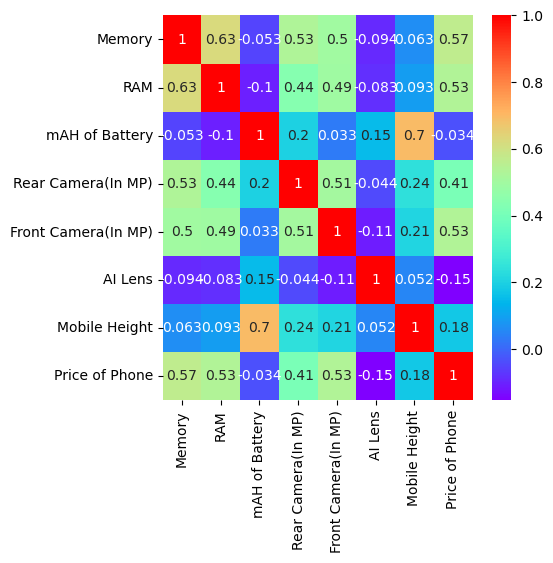

In [52]:
# A heatmap is a great way to visualize correlation or intensity between variables in a tabular format,
# where values are represented by colors.
# The most common use in data science is for visualizing correlation matrices.

plt.figure(figsize=(5,5))
sns.heatmap(corrDf,annot=True,cmap='rainbow')

# Insights
#> 1 or -1 : Perfact correlation (Positive or Negative)
# 0 : No Correlation
# Positive values= Indicates that as one features increases, the other tends to increase as well.
# Negative values= Indicates that as one features increases, the other tends to decrease.

## Box Plot

<Axes: ylabel='Price of Phone'>

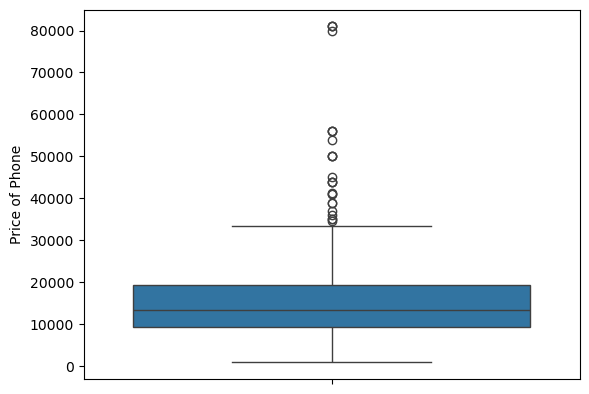

In [54]:
# A box plot is a great way to visualize the distribution of a dataset and spot outliers, median, and spread.
sns.boxplot(data = data,y = 'Price of Phone') 
# Insights 
# there are some outliers present 

In [56]:
def iqr_technique(DFcolumn):
    Q1 = np.percentile(DFcolumn, 25)
    Q3 = np.percentile(DFcolumn, 75)
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range, upper_range

In [57]:
# Make variables for lower and upper limit
lower_limit_iqr,upper_limit_iqr = iqr_technique(data['Price of Phone'])

In [58]:
# Cap the outliers
data['Price of Phone'] = np.where(data['Price of Phone']>upper_limit_iqr,upper_limit_iqr,np.where(data['Price of Phone']<lower_limit_iqr,lower_limit_iqr,data['Price of Phone']))

<Axes: ylabel='Price of Phone'>

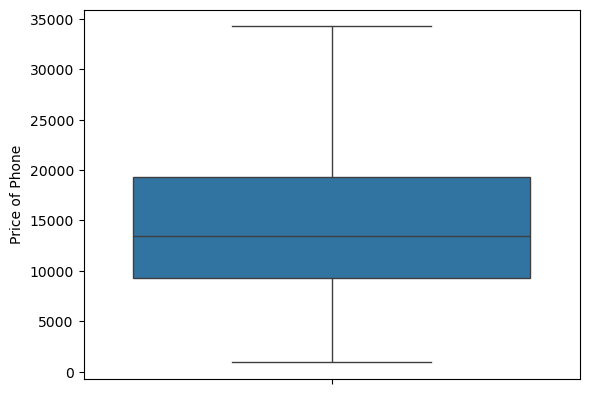

In [59]:
# Box plot of price after handling outliers
sns.boxplot(data = data,y = 'Price of Phone')
# Outiliers will removed clearly shown in box plot

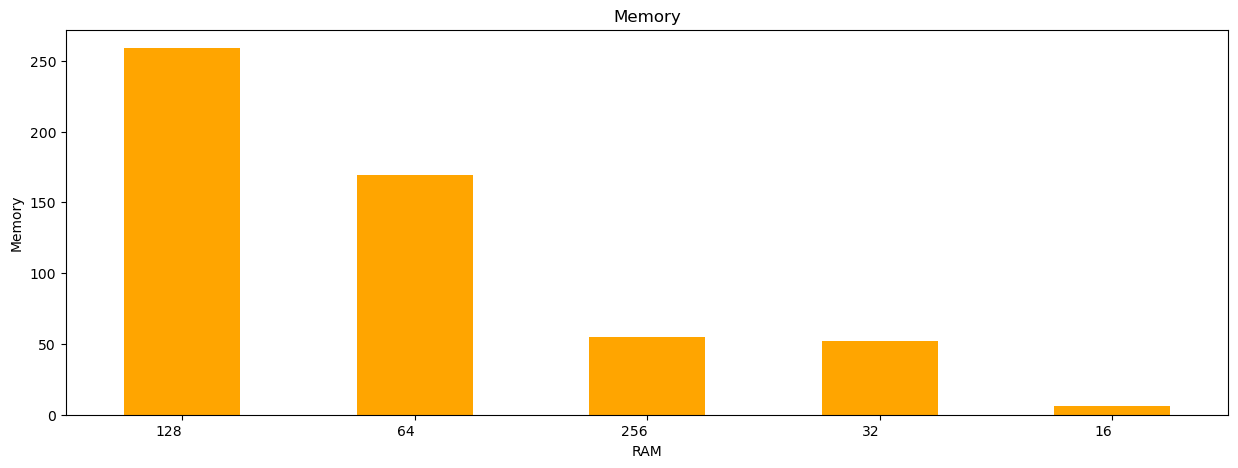

In [55]:
# Memroy in RAM
Memory_counts=data['Memory'].value_counts().head(10)
plt.figure(figsize=(15,5))
Memory_counts.plot(kind='bar',color='orange')
plt.title('Memory')
plt.xlabel('RAM')
plt.ylabel('Memory')
plt.xticks(rotation=0 , ha='right')
plt.show()

# Insights
# we have learn from this plot that higher the Memory higher the RAM.

## Scatter Plot

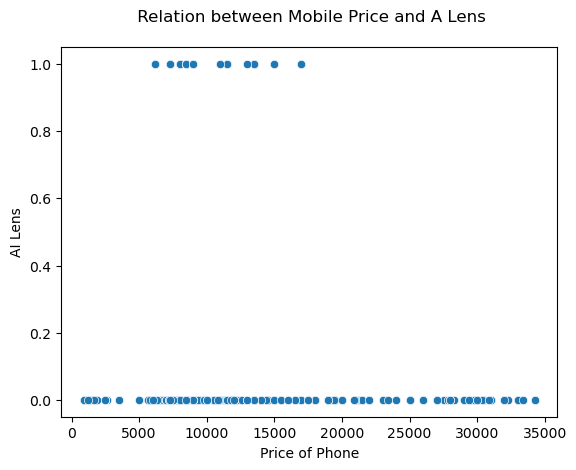

In [61]:
# A scatter plot is a fundamental visualization used to display the relationship between two numerical variables.
# Visualize the relation between Phone price and AI Lens
sns.scatterplot(data = data,x = 'Price of Phone',y= 'AI Lens')
plt.title(' Relation between Mobile Price and A Lens\n')
plt.show()

# Insights
# > we have shown that AI lens range from o and 1.

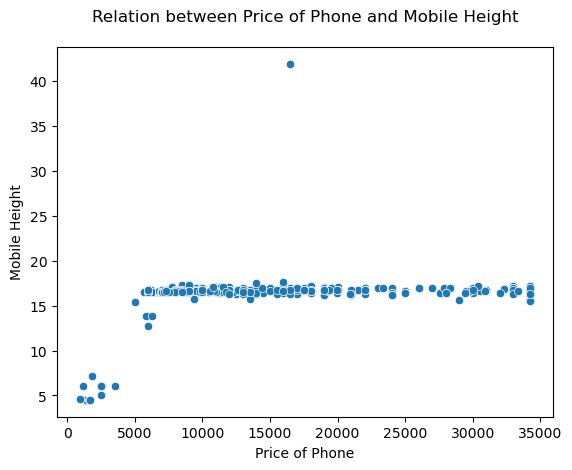

In [62]:
# Visualize the relation between Phone price and Mobile Height
sns.scatterplot(data = data,x = 'Price of Phone',y= 'Mobile Height')
plt.title('Relation between Price of Phone and Mobile Height\n')
plt.show()

## Feature Extraction

#### Remove AI Lens and Mobile height columns as these features are not affecting the price of Mobile


In [140]:
data.drop(['AI Lens','Mobile Height'],axis = 1, inplace=True)

In [142]:
#Head of encoded Data
data.head()

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Processor in Phone,Price of Phone
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0


### Feature Creation


In [145]:
# Make a feature for Camera Quality index by adding both the camera's
def concat_colums(x,y):
    if x>0 and y>0:
        return str(x) + '+' + str(y)
    elif x==0 and y>0 :
        return str(y)
    elif x>0 and y == 0:
        return str(x)
    else:
        return str(0)
concat_colums(0,0)    

'0'

In [147]:
# Apply function in dataset to add new feature
data['Camera quality index (Front + Rear specs in MP)'] = data.apply(lambda x: concat_colums(x['Front Camera(In MP)'],x['Rear Camera(In MP)']),axis = 1)

In [149]:
# Make a feature for Phone Storage by adding both memory columns
data['Phone storage(RAM +ROM in GB)'] = data.apply(lambda x: concat_colums(x['RAM'],x['Memory']),axis = 1)

In [151]:
# Values counts of Phone storage
data['Phone storage(RAM +ROM in GB)'].value_counts()

Phone storage(RAM +ROM in GB)
4+64     132
8+128    114
6+128    102
4+128     42
8+256     40
3+32      29
2+32      22
6+64      15
2+64      11
3+64       9
4+256      8
6+256      4
4+16       3
2+16       2
8+64       2
2+256      2
3+256      1
4+32       1
8+16       1
3+128      1
Name: count, dtype: int64

In [153]:
# Values counts of Camara Quality index
data['Camera quality index (Front + Rear specs in MP)'].value_counts()

Camera quality index (Front + Rear specs in MP)
8+50      94
16+50     82
5+8       51
5+13      46
5+50      38
16+64     37
13+50     27
16+108    25
13+48     18
8+13      17
32+50     12
8+64      11
0         10
16+48     10
2          6
16+200     6
12+12      5
32+64      5
13+64      4
50+64      4
2+5        3
50+50      3
32+108     3
8+48       2
16+32      2
60+108     2
60+200     2
44+50      2
16+40      2
8+12       2
8+108      1
8+16       1
8+8        1
10+50      1
32+48      1
32+12      1
20+12      1
20+64      1
10+12      1
12+50      1
Name: count, dtype: int64

In [155]:
# Head of Data now after feature engineering
data.head()

,Model,Colour,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Processor in Phone,Price of Phone,Camera quality index (Front + Rear specs in MP),Phone storage(RAM +ROM in GB)
0,Infinix SMART 7,Night Black,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
1,Infinix SMART 7,Azure Blue,64,4,6000,13,5,Unisoc Spreadtrum SC9863A1,7299.0,5+13,4+64
2,MOTOROLA G32,Mineral Gray,128,8,5000,50,16,Qualcomm Snapdragon 680,11999.0,16+50,8+128
3,POCO C50,Royal Blue,32,2,5000,8,5,Mediatek Helio A22,5649.0,5+8,2+32
4,Infinix HOT 30i,Marigold,128,8,5000,50,5,G37,8999.0,5+50,8+128


In [157]:
# Save final dataset to system
data.to_csv('Final_data.csv')

### Correlation Matrix

In [160]:
correlation_matrix = data.corr(numeric_only=True)

In [162]:
correlation_matrix

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Price of Phone
Memory,1.000000,0.625284,-0.053210,0.530615,0.496865,0.566660
RAM,0.625284,1.000000,-0.104923,0.439558,0.493861,0.532024
mAH of Battery,-0.053210,-0.104923,1.000000,0.198260,0.032970,-0.034297
Rear Camera(In MP),0.530615,0.439558,0.198260,1.000000,0.505378,0.410367
Front Camera(In MP),0.496865,0.493861,0.032970,0.505378,1.000000,0.532321
Price of Phone,0.566660,0.532024,-0.034297,0.410367,0.532321,1.000000


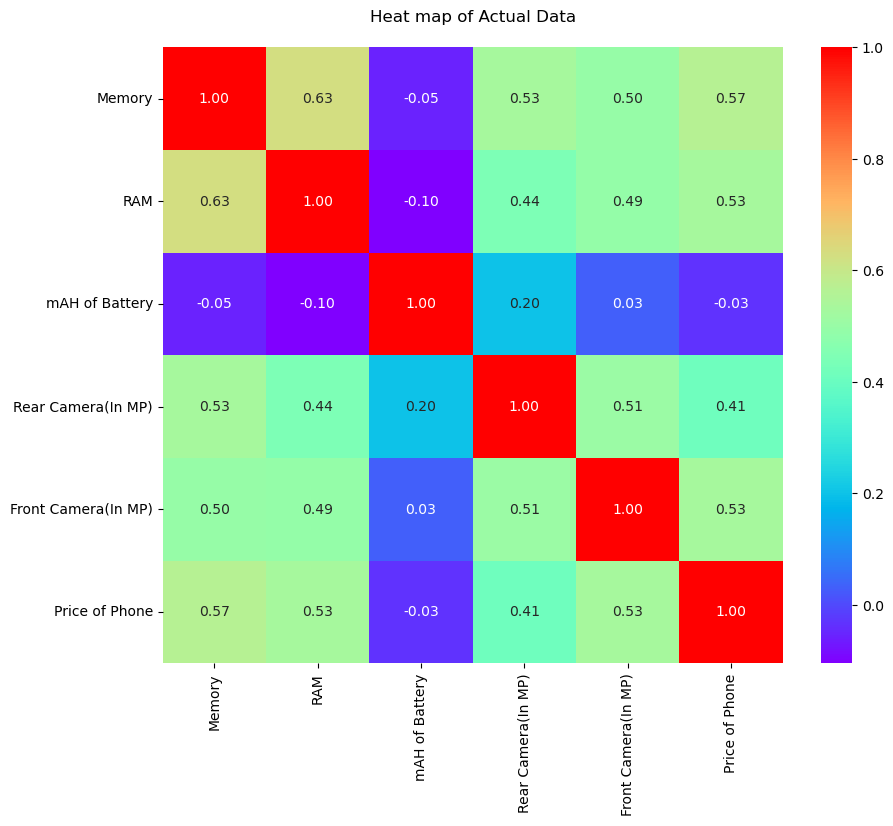

In [164]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot= True,cmap='rainbow',fmt=".2f")
plt.title('Heat map of Actual Data\n')
plt.show()

# Insights
#> 1 or -1 : Perfact correlation (Positive or Negative)
# 0 : No Correlation
# Positive values= Indicates that as one features increases, the other tends to increase as well.
# Negative values= Indicates that as one features increases, the other tends to decrease.

###  One-hot Encoding

In [168]:
# Convert categorical variables in to numerical variables using one-hot encoding
categorical_cols = ['Model', 'Colour', 'Processor in Phone','Phone storage(RAM +ROM in GB)','Camera quality index (Front + Rear specs in MP)']
encoded_data = pd.get_dummies(data,columns=categorical_cols,drop_first=True,dtype=int)

In [172]:
encoded_data


,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Price of Phone,Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
0,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,64,4,6000,13,5,7299.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,128,8,5000,50,16,11999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,32,2,5000,8,5,5649.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,128,8,5000,50,5,8999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,256,8,3900,50,12,79999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,32,2,3100,5,2,5998.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,64,4,5000,50,8,9990.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
539,128,8,5000,50,32,38999.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building

In [179]:
# Break data in Feature and target
x = encoded_data.drop('Price of Phone',axis = 1)
y = encoded_data['Price of Phone']

In [181]:
# Split the dataset into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [183]:
# Head of x_train
x_train.head()

,Memory,RAM,mAH of Battery,Rear Camera(In MP),Front Camera(In MP),Model_APPLE iPhone 12,Model_APPLE iPhone 14 Plus,Model_Google Pixel 6a,Model_Google Pixel 7,Model_Google Pixel 7a,...,Camera quality index (Front + Rear specs in MP)_60+108,Camera quality index (Front + Rear specs in MP)_60+200,Camera quality index (Front + Rear specs in MP)_8+108,Camera quality index (Front + Rear specs in MP)_8+12,Camera quality index (Front + Rear specs in MP)_8+13,Camera quality index (Front + Rear specs in MP)_8+16,Camera quality index (Front + Rear specs in MP)_8+48,Camera quality index (Front + Rear specs in MP)_8+50,Camera quality index (Front + Rear specs in MP)_8+64,Camera quality index (Front + Rear specs in MP)_8+8
244,16,8,1200,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,128,4,5000,50,8,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
417,128,8,4270,50,8,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
509,128,6,5000,50,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
353,64,4,5000,13,5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [185]:
# Scaling of features dataset as some features have higher values
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [187]:
x_train_scaled

array([[-1.59768439,  1.29743281, -4.6511294 , ..., -0.45834925,
        -0.12833779, -0.04816831],
       [ 0.28737125, -0.71691031,  0.16804888, ...,  2.18174242,
        -0.12833779, -0.04816831],
       [ 0.28737125,  1.29743281, -0.75774063, ...,  2.18174242,
        -0.12833779, -0.04816831],
       ...,
       [-0.7898034 , -0.71691031,  1.43625369, ...,  2.18174242,
        -0.12833779, -0.04816831],
       [-1.32839073, -1.72408188,  0.16804888, ..., -0.45834925,
        -0.12833779, -0.04816831],
       [ 0.28737125,  1.29743281,  0.16804888, ..., -0.45834925,
        -0.12833779, -0.04816831]])

### First Develop Machine learning Model with linear regression

In [195]:
# Make object of Model
lr_model = LinearRegression()

In [197]:
# Fit the training dataset in object of model
lr_model.fit(x_train_scaled,y_train)

LinearRegression()

In [199]:
# Predict the test Data with Model
y_prediction = lr_model.predict(x_test_scaled)

In [201]:
# Score of model
lr_model.score(x_test_scaled,y_test) #This model is giving negative score so we will check it with another model

-7.453757707733756e+25

In [203]:
# Mean Absolute Error
mae1 = mean_absolute_error(y_test, y_prediction)
mae1

5.4575707234263864e+16

In [205]:
# Root Mean Square Score
rmse1 = mean_squared_error(y_test, y_prediction, squared=False)
rmse1

1.013575346003215e+17

In [207]:
# R2 score
r2_ = r2_score(y_test, y_prediction)
r2_

-7.453757707733756e+25

### Now Develop Machine learning Model with Random Forest

In [210]:
# Make object of model
rf_model = RandomForestRegressor()

In [212]:
# Fit the training dataset in object of model
rf_model.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [214]:
# Predict the test Data with Model
y_pred = rf_model.predict(x_test_scaled)

In [217]:
# Score of model
rf_model.score(x_test_scaled,y_test)

0.8406890204660931

### Evaluation

In [226]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
mae

1757.4656258191349

In [228]:
# Root Mean Square Score
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

4685.881013482584

In [230]:
# R2 score
r2 = r2_score(y_test, y_pred)
r2

0.8406890204660931

In [234]:
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)
print("Mean R2 score Error:", r2) # This model is giving good R2 score.

Mean Absolute Error: 1757.4656258191349
Root Mean Squared Error: 4685.881013482584
Mean R2 score Error: 0.8406890204660931


### Plot of Test target and Predicted target with Random Forest Model


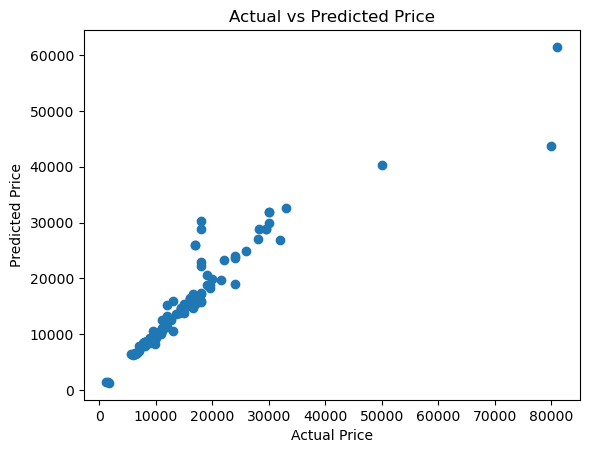

In [240]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()
# Insights > This model is good as it is giving good results with test data and accuracy is also approx more than 89%.

 ### Plot of Test target and Predicted target with Linear Regression Model

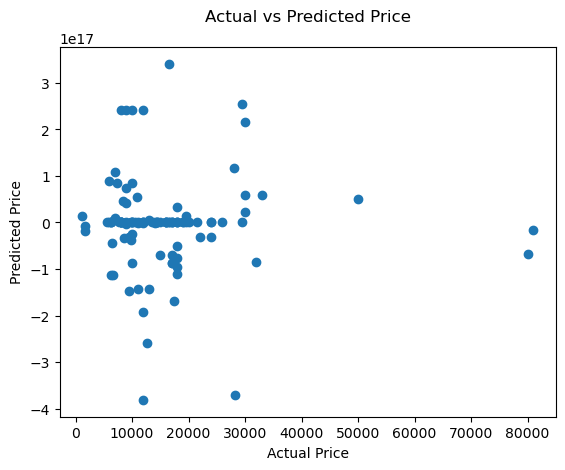

In [245]:
plt.scatter(y_test, y_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price\n')
plt.show()
# Insights > This model is not good enough for this data set.

### Feature Importance Analysis:

In [254]:
# For linear regression, we can analyze the coefficients of the model
feature_importance = pd.DataFrame({'Feature': encoded_data.drop('Price of Phone',axis = 1).columns, 'Coefficient': lr_model.coef_})
print(feature_importance.sort_values(by='Coefficient', ascending=False))

                                               Feature   Coefficient
103                         Model_REDMI Note 12 Pro 5G  3.277809e+16
194                                    Colour_Aqua Sky  3.258965e+16
107                           Model_SAMSUNG Galaxy A04  3.112047e+16
16                               Model_Infinix HOT 30i  2.690100e+16
86                                Model_POCO X5 Pro 5G  2.291050e+16
..                                                 ...           ...
25                           Model_Infinix Note 12 Pro -1.980931e+16
258                                   Colour_Eco Black -2.029727e+16
89                               Model_REDMI 10A SPORT -2.048609e+16
613  Camera quality index (Front + Rear specs in MP... -2.057004e+16
150                                  Model_realme C25s -2.642590e+16

[645 rows x 2 columns]


In [256]:
# Top 20 Most important features
feature_importance.sort_values(by='Coefficient', ascending=False)[0:20]

,Feature,Coefficient
103,Model_REDMI Note 12 Pro 5G,3.277809e+16
194,Colour_Aqua Sky,3.258965e+16
107,Model_SAMSUNG Galaxy A04,3.112047e+16
16,Model_Infinix HOT 30i,2.690100e+16
86,Model_POCO X5 Pro 5G,2.291050e+16
55,Model_MOTOROLA g82 5G,2.267586e+16
397,Colour_Satin Silver,2.208977e+16
65,Model_OPPO A78 5G,2.155633e+16
458,Colour_Watery Blue,2.000532e+16
459,Colour_Watery Grey,2.000532e+16


### Feature Importance analysis with Random Forest model

In [259]:
# get the feature importance
feature_importances = rf_model.feature_importances_

In [263]:
# Create a dataframe to visualize the feature importances
feature_importances_df = pd.DataFrame({'Feature': encoded_data.drop('Price of Phone',axis = 1).columns, "Importance": feature_importances})

In [265]:
# Sort the data by importance in the descending order
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

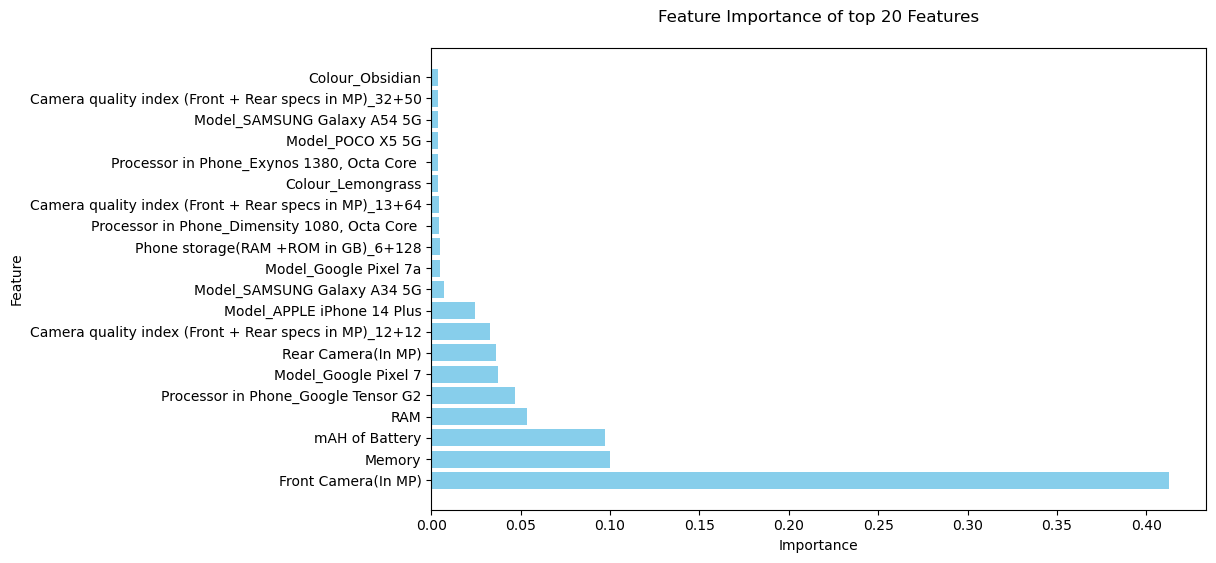

In [271]:
# Plot the feature importance(Top 20 features)
plt.figure(figsize=(10,6))
plt.barh(feature_importances_df['Feature'][0:20], feature_importances_df["Importance"][0:20], color='skyblue')
plt.xlabel('Importance')
plt.ylabel("Feature")
plt.title('Feature Importance of top 20 Features\n')
plt.show()

In [275]:
# Total columns for analysis
data.columns

Index(['Model', 'Colour', 'Memory', 'RAM', 'mAH of Battery',
       'Rear Camera(In MP)', 'Front Camera(In MP)', 'Processor in Phone',
       'Price of Phone', 'Camera quality index (Front + Rear specs in MP)',
       'Phone storage(RAM +ROM in GB)'],
      dtype='object')

### Report and Visualization

#### Mobile price variation with memory in phone(Bar Plot)

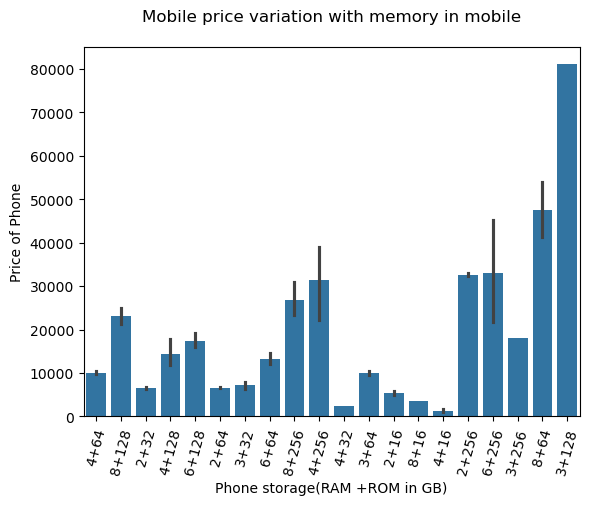

In [281]:
sns.barplot(data = data,x="Phone storage(RAM +ROM in GB)",y = 'Price of Phone')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with memory in mobile\n')
plt.show()
# Insights > we have shown that average Ram and Rom(3+128GB) is higher with price of phone will high.

#### Mobile price variation with memory in phone(Scatter Plot)


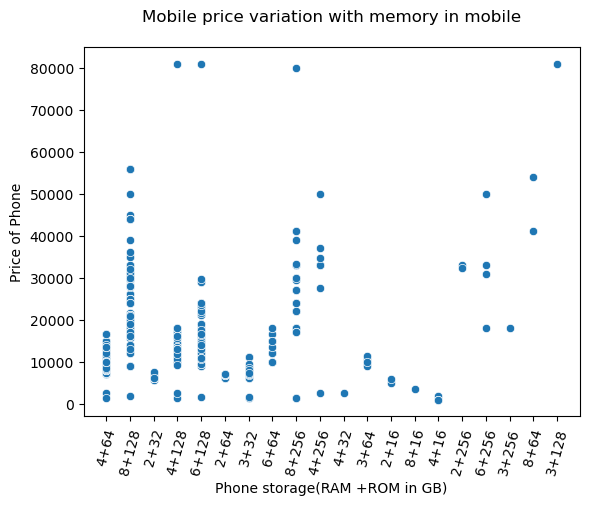

In [288]:
sns.scatterplot(data = data,x="Phone storage(RAM +ROM in GB)",y = 'Price of Phone')
plt.xticks(rotation = 75)
plt.title('Mobile price variation with memory in mobile\n')
plt.show()
# Insights > The graph illustrates the relationship between mobile phone prices and their memory capacity (combined RAM and ROM) in gigabytes (GB). Here are the key observations

#### Mobile price variation with camera quality index in phone(Bar Plot)

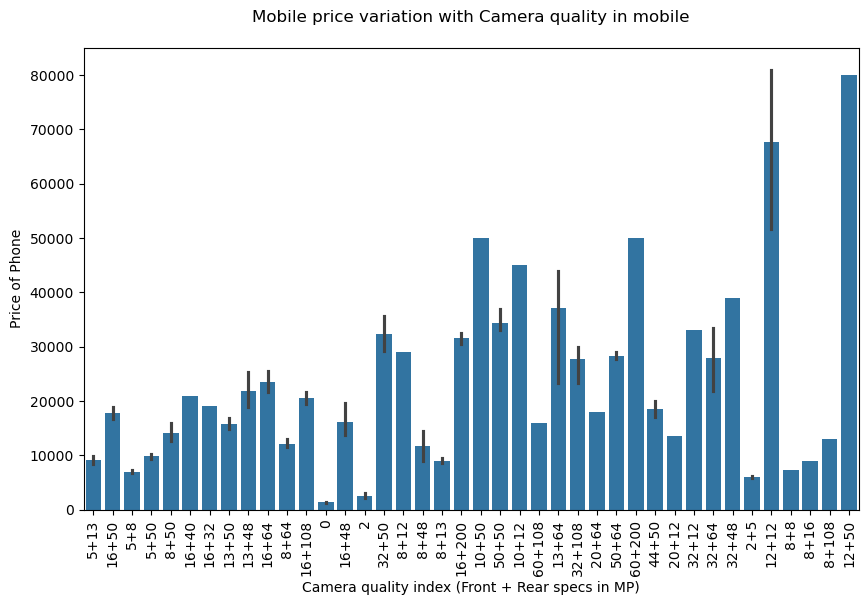

In [293]:
plt.figure(figsize=(10,6))
sns.barplot(data = data,x="Camera quality index (Front + Rear specs in MP)",y = 'Price of Phone')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()

#### Mobile price variation with camera quality index in phone(Scatter Plot)

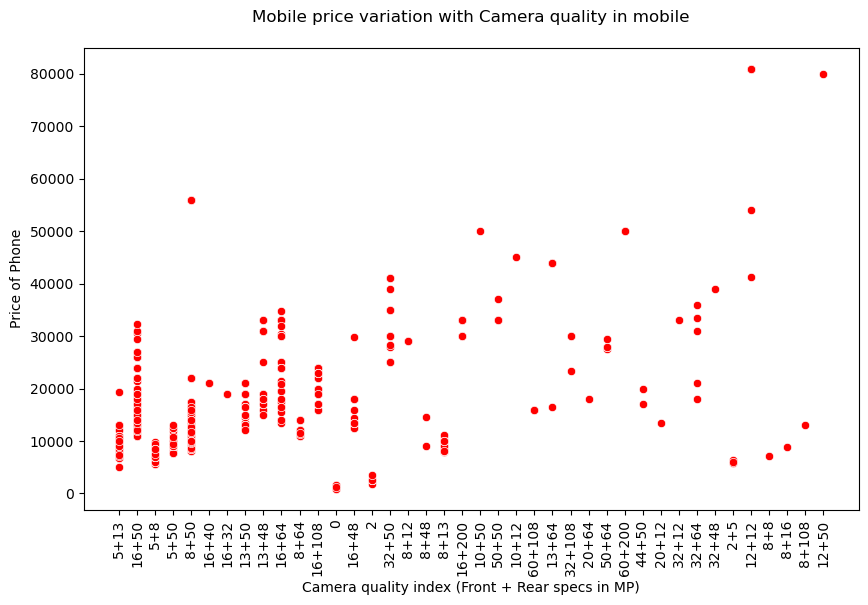

In [298]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = data,x="Camera quality index (Front + Rear specs in MP)",y = 'Price of Phone',color='red')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Camera quality in mobile\n')
plt.show()
# Insights > The graph illustrates the relationship between camera quality index (measured in megapixels for both front and rear cameras) and the price of mobile phones. Here are the key takeaways from the graph:
# Positive Correlation: Generally, as the camera quality (in megapixels) increases, the price of the mobile phone tends to rise. This suggests that consumers are willing to pay more for better camera specifications.

#### Mobile price variation with Battery size

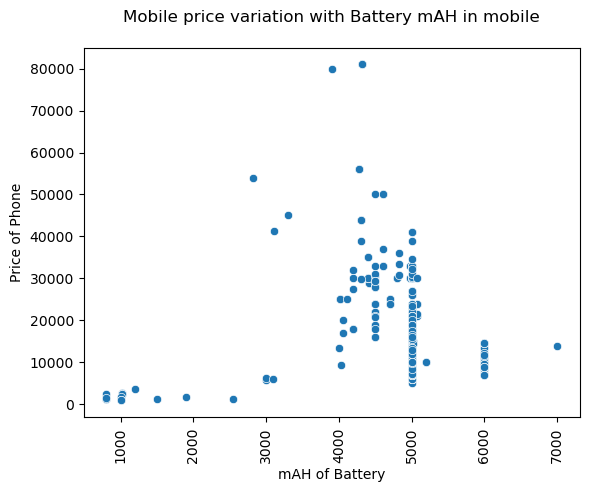

In [303]:
sns.scatterplot(data = data,x="mAH of Battery",y = 'Price of Phone')
plt.xticks(rotation = 90)
plt.title('Mobile price variation with Battery mAH in mobile\n')
plt.show()
# Insights > The scatter plot graph in the image illustrates the correlation between mobile price and battery capacity (mAh).
# Surprisingly, it reveals an interesting pattern: higher battery capacity does not necessarily correlate with a higher price.

#  Thank You